## 入場者数の予測

時系列モデルを使って予測を行った

In [1]:
#モジュールのインストール
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# 時系列データを扱うライブラリ
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates

from prophet import Prophet                     #Prophet
from neuralprophet import NeuralProphet         #NeuralProphet
from sklearn.metrics import mean_absolute_error #評価指標MAE
from statistics import mean                     #平均値の計算

In [2]:
admission = pd.read_csv("入場者数_編集.csv")
admission.columns = ['ds','y']

In [3]:
admission['ds'] = pd.to_datetime(admission['ds'])
admission.info()
admission

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2040 non-null   datetime64[ns]
 1   y       2040 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 32.0 KB


,ds,y
0,2016-04-01,125
1,2016-04-02,502
2,2016-04-03,318
3,2016-04-04,190
4,2016-04-05,298
...,...,...
2035,2021-10-27,104
2036,2021-10-28,138
2037,2021-10-29,98
2038,2021-10-30,208


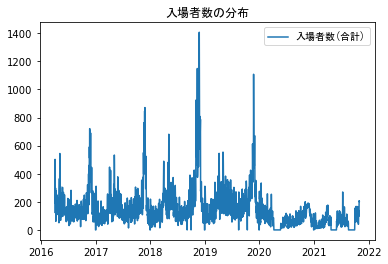

In [4]:
plt.plot(admission['ds'],admission['y'])
plt.title("入場者数の分布",fontname="MS Gothic")
plt.legend(["入場者数(合計)"], prop={"family":"MS Gothic"})
plt.show()


In [5]:
#2016年4月から2018年12月までのデータ
admission_train = admission.iloc[0:1004]
#2019年1月から12月までのデータ
admission_test = admission.iloc[1005:1369]

In [6]:
admission_train.info()
admission_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1004 non-null   datetime64[ns]
 1   y       1004 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.8 KB


,ds,y
0,2016-04-01,125
1,2016-04-02,502
2,2016-04-03,318
3,2016-04-04,190
4,2016-04-05,298


In [7]:
admission_test.info()
admission_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 1005 to 1368
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      364 non-null    datetime64[ns]
 1   y       364 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


,ds,y
1005,2019-01-01,311
1006,2019-01-02,261
1007,2019-01-03,291
1008,2019-01-04,238
1009,2019-01-05,224


### Prophetモデル

In [8]:
admission_prophet_model = Prophet(seasonality_mode='multiplicative')

In [9]:
admission_prophet_model.fit(admission_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
WARNING - (py.warnings._showwarnmsg) - C:\Users\Naoki\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)

  components = components.append(new_comp)



In [10]:
admission_future = admission_prophet_model.make_future_dataframe(periods=365, freq='D')
admission_pred = admission_prophet_model.predict(admission_future)

WARNING - (py.warnings._showwarnmsg) - C:\Users\Naoki\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)

  components = components.append(new_comp)

WARNING - (py.warnings._showwarnmsg) - C:\Users\Naoki\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)

  components = components.append(new_comp)



WARNING - (py.warnings._showwarnmsg) - C:\Users\Naoki\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)

  components = components.append(new_comp)

WARNING - (py.warnings._showwarnmsg) - C:\Users\Naoki\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)

  components = components.append(new_comp)



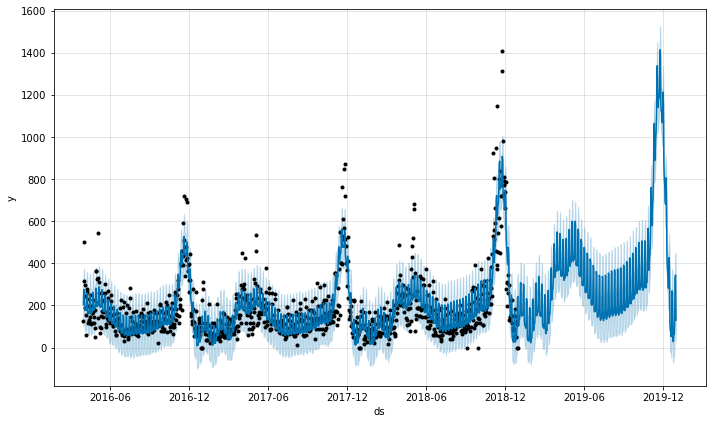

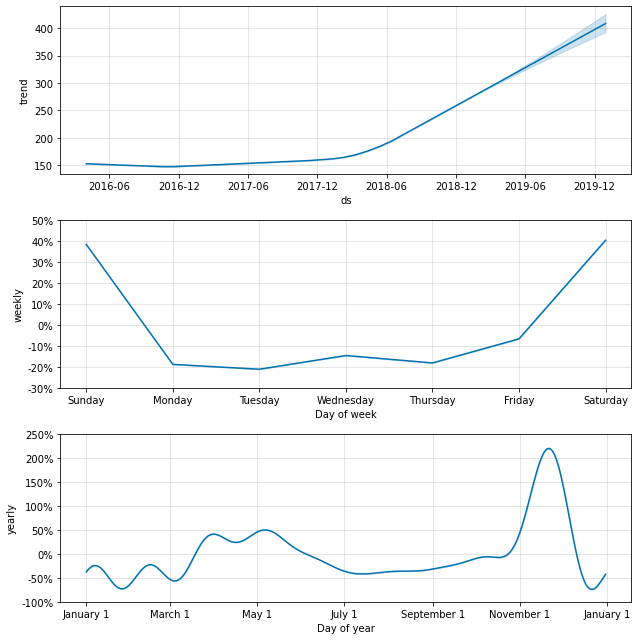

In [11]:
admission_pred_plot = admission_prophet_model.plot(admission_pred)
admission_pmpc = admission_prophet_model.plot_components(admission_pred)

In [12]:
admission_test['Prophet Predict'] = admission_pred.iloc[1005:1369].loc[:, 'yhat']

WARNING - (py.warnings._showwarnmsg) - C:\Users\Naoki\AppData\Local\Temp\ipykernel_16032\1106736670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admission_test['Prophet Predict'] = admission_pred.iloc[1005:1369].loc[:, 'yhat']

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admission_test['Prophet Predict'] = admission_pred.iloc[1005:1369].loc[:, 'yhat']



In [13]:
admission_test.head()
ds = admission_test['ds']
y = admission_test['y']
ProphetPredict = admission_test['Prophet Predict']

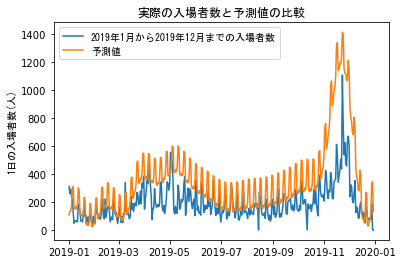

In [14]:
plt.title("実際の入場者数と予測値の比較",fontname="MS Gothic")
plt.plot(ds, y, label="2019年1月から2019年12月までの入場者数")
plt.plot(ds,ProphetPredict, label="予測値")
plt.ylabel("1日の入場者数(人)",fontname="MS Gothic")
plt.legend(prop={"family":"MS Gothic"})
plt.show()

MAE:
162.17757013827386
MAPE:
inf


<AxesSubplot:title={'center':'Forecast evaluation'}>

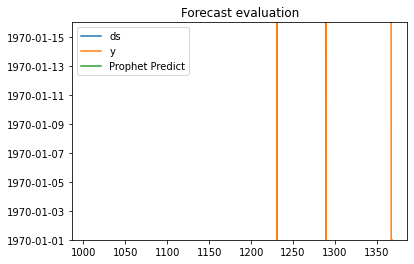

In [15]:
print('MAE:')
print(mean_absolute_error(admission_test['y'], admission_test['Prophet Predict'])) 
print('MAPE:')
print(mean(abs(admission_test['y'] - admission_test['Prophet Predict'])/admission_test['y']) *100)
admission_test.plot(title='Forecast evaluation',ylim=[0,15])

### NeuralProphetモデル

In [16]:
admission_nprophet_model = NeuralProphet(seasonality_mode='multiplicative')
admission_nprophet_model_result = admission_nprophet_model.fit(admission_train, freq = "D")

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.9% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.9% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 194
INFO:NP.config:Auto-set epochs to 194


  0%|          | 0/126 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.79E-02, min: 5.86E-01
INFO:NP.utils_torch:lr-range-test results: steep: 6.79E-02, min: 5.86E-01


  0%|          | 0/126 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.79E-02, min: 8.17E-01
INFO:NP.utils_torch:lr-range-test results: steep: 6.79E-02, min: 8.17E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.73E-02
INFO:NP.forecaster:lr-range-test selected learning rate: 7.73E-02
Epoch[194/194]: 100%|██████████| 194/194 [00:22<00:00,  8.49it/s, SmoothL1Loss=0.0164, MAE=58, RMSE=84.6, RegLoss=0]  


In [17]:
admission_future = admission_nprophet_model.make_future_dataframe(admission_train, 
                                                      periods = 365, 
                                                      n_historic_predictions=len(admission_train))
admission_pred = admission_nprophet_model.predict(admission_future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.9% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.9% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - C:\Users\Naoki\anaconda3\lib\site-packages\neuralprophet\forecaster.py:2060: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.927% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.927% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequen

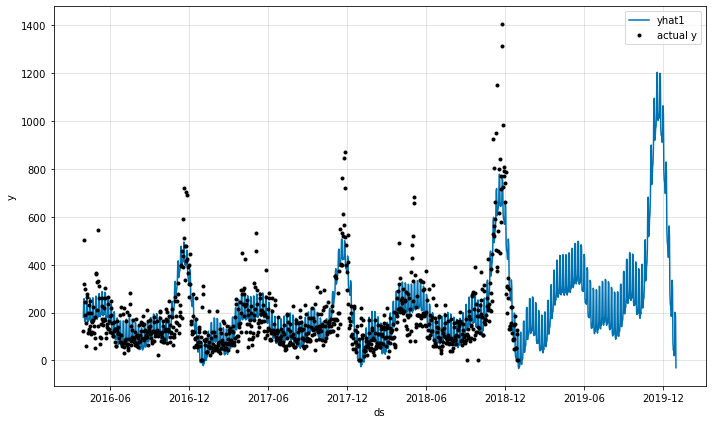

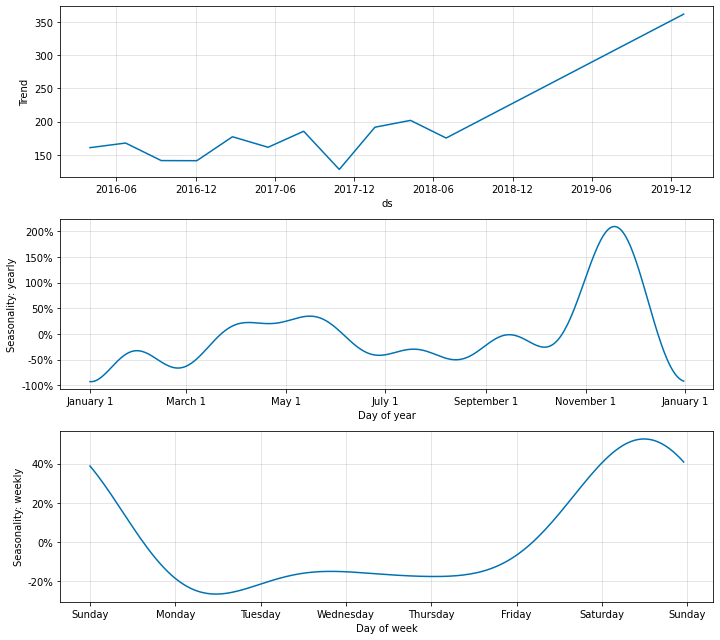

In [18]:
# Peyton ManningのWikipediaのPV
# NeuralProphet 予測モデルの予測結果（学習データ期間＋テストデータ期間）
admission_pred_plot = admission_nprophet_model.plot(admission_pred)         #予想値（点は学習データの実測値）
admission_pmpc = admission_nprophet_model.plot_components(admission_pred)   #モデルの要素分解

In [19]:
admission_test['NeuralProphet Predict'] = admission_pred.iloc[1005:1369].loc[:, 'yhat1']

WARNING - (py.warnings._showwarnmsg) - C:\Users\Naoki\AppData\Local\Temp\ipykernel_16032\1626329496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admission_test['NeuralProphet Predict'] = admission_pred.iloc[1005:1369].loc[:, 'yhat1']

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admission_test['NeuralProphet Predict'] = admission_pred.iloc[1005:1369].loc[:, 'yhat1']



In [20]:
admission_test.head()
ds = admission_test['ds']
y = admission_test['y']
ProphetPredict = admission_test['Prophet Predict']
NeuralProphetPredict = admission_test['NeuralProphet Predict']

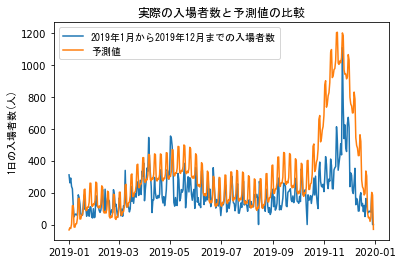

In [21]:
plt.title("実際の入場者数と予測値の比較",fontname="MS Gothic")
plt.plot(ds, y, label="2019年1月から2019年12月までの入場者数")
plt.plot(ds,NeuralProphetPredict, label="予測値")
plt.ylabel("1日の入場者数(人)",fontname="MS Gothic")
plt.legend(prop={"family":"MS Gothic"})
plt.show()

MAE(Prophet):
162.17757013827386
MAE(NeuralProphet):
141.0739996610107
----------------------------
MAPE(Prophet):
inf
MAPE(NeuralProphet):
inf


<AxesSubplot:title={'center':'Forecast evaluation'}>

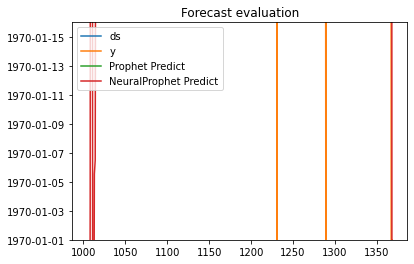

In [22]:
# Peyton ManningのWikipediaのPV
# NeuralProphet 予測モデルの精度検証（テストデータ期間）
print('MAE(Prophet):')
print(mean_absolute_error(admission_test['y'], admission_test['Prophet Predict'])) 
print('MAE(NeuralProphet):')
print(mean_absolute_error(admission_test['y'], admission_test['NeuralProphet Predict'])) 
print('----------------------------')
print('MAPE(Prophet):')
print(mean(abs(admission_test['y'] - admission_test['Prophet Predict'])/admission_test['y']) *100)
print('MAPE(NeuralProphet):')
print(mean(abs(admission_test['y'] - admission_test['NeuralProphet Predict'])/admission_test['y']) *100)
admission_test.plot(title='Forecast evaluation',ylim=[0,15])